# Simulation, analyze and plots

## Previous work
- Import real SCZ CNV data (deletion/duplication, start and end). There are $3085$ samples for deletion, and $4234$ samples for duplication.
- Import real gene data (chr, start and end).  But there are multiple replicates and overlapped exons/alleles as follows, and there is a small chance that the exon names are shared among different chromosomes. All overlapped exons are merged on each chromosome regardless of their names. As a results, there are $23343$ non-overlapping genes/exons in total.

        1    11868    14362    LOC102725121
        1    11873    14409    DDX11L1
        1    14361    29370    WASH7P
        1    17368    17436    MIR6859-1
        1    30365    30503    MIR1302-2


- Obtain X matrix of CNVs's overlaps with genes/exons for deletion and duplication: rows are individuals ($3085$ for deletion) and columns are genes/exons ($23343$ genes). It is a binary matrix: 1 indicates CNV overlaps with the particular gene if CNV exists for this individual, 0 indicates no overlaps or no CNVs.

## Simulation
- Step 1: Obtain gene blocks (ignore chromosome boundaries): each gene block contains at least 30 genes/exons. Every separator gene/exon must be not overlapped with CNV events for all individuals. 
- Step 2: Simulate samples (X matrix) for deletion: sample each block from non-repetitive individuals and merge them together as a simulated individual. Repeat this process for $100,000$ times to collect $100,000$ individuals before simulating phenotype.
- Step 3: Simulate phenotype (y matrix): set penetrance/prevalence as $0.05$, prevalence (p) $\approx \frac{e^{\beta_0}}{1-e^{\beta_0}}$, so $\beta_0 \approx \log \frac{p}{1-p}$. Odds ratio (OR) follows $e^{Normal Distribution}$ or Gamma distribution, $\beta_j = \text{log(OR)}$, then use Bernoulli ($0.05$) to decrease $95$% of $\beta_j$'s to 0.  simulate y (1 as case and 0 as control). $\text{logit}(y)=X\boldsymbol{\beta}+\beta_0$, $y=\frac{e^{x\boldsymbol{\beta}+\beta_0}}{1+e^{x\boldsymbol{\beta}+\beta_0}}$ (probabilities). Then use Bernoulli ($y_i$) to multiply $y_i$ itself to generate 1's and 0's. Then select all 1's (about $6700$) as cases and randomly select equal amount of 0's as controls.

## Histogram
- Compare the number of genes/exons in all natural blocks, i.e. remove columns with all 0's and then obtain natual blocks separated by all 0's, for X matrix of both real individuals and simulated samples.

> /home/min/GIT/cnv-gene-mapping/data/deletion.genes.block1.histogram.pdf (11.7 KiB):

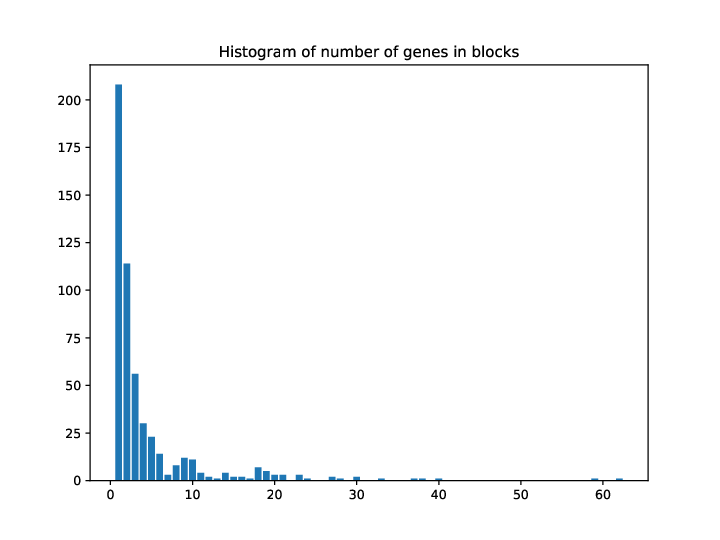

In [2]:
%preview /home/min/GIT/cnv-gene-mapping/data/deletion.genes.block1.histogram.pdf -s png --dpi 90

> /home/min/GIT/cnv-gene-mapping/data/deletion_simu/deletion.genes.block30.for_simu.sample.genes.block1.histogram.pdf (11.8 KiB):

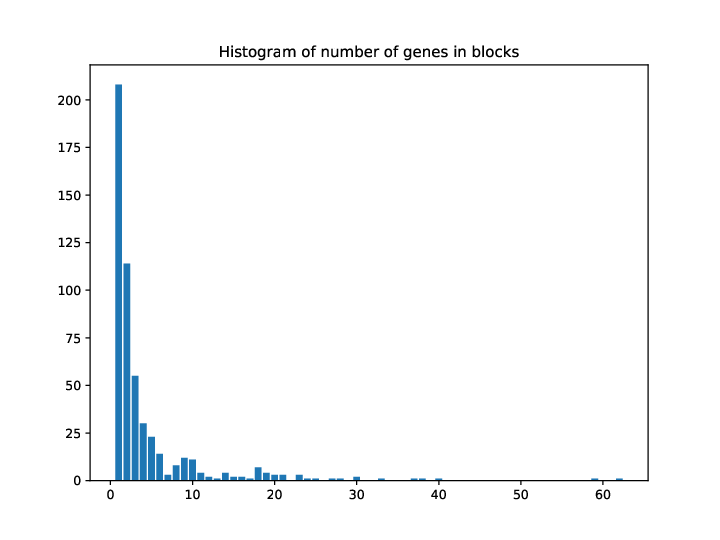

In [3]:
%preview /home/min/GIT/cnv-gene-mapping/data/deletion_simu/deletion.genes.block30.for_simu.sample.genes.block1.histogram.pdf -s png --dpi 90

## Analyze
- SuSiE: use R package `SuSiE`. L=1, pve=0.005, 
- varbvs: use R package `varbvs`.

### SuSiE and varbvs results comparison for block #505 as an example
gene: #20701 to #20708
beta: 

      0.0
      0.18675656477875957
      0.0
      1.7125629940213394
      0.0
      0.0
      0.0
      0.4756589144219433

- SuSiE pip: all 0.1 for 10 genes/exons
        0.00348587459776606
        0.00348587459776606
        0.76964804479735
        0.0706923644116202
        0.0706923644116202
        0.0706923644116202
        0.00565155638612869
        0.00565155638612869

- varbvs pip: all around 0.132, but slightly different for 10 genes/exons
        20701
            0.116707586870715
        20702
            0.116702412585606
        20703
            0.996644700231258
        20704
            0.0580887469064442
        20705
            0.0580847159146005
        20706
            0.0580815050059259
        20707
            0.0717545436636593
        20708
            0.0717504665493366

## Questions
- The distributions that $\beta_j$'s follow are not comparable with each other. For example, the distribution (ppf) Normal(2.191, 0.268) and Gamma(3, 1) are not close. I use Normal(1, 0.5) to be comparable with Gamma(3, 1).